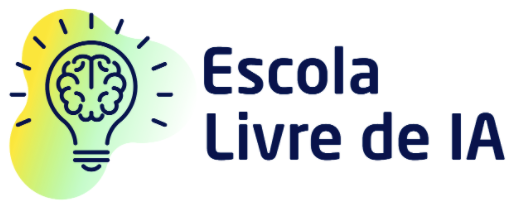

# Introdução KNN

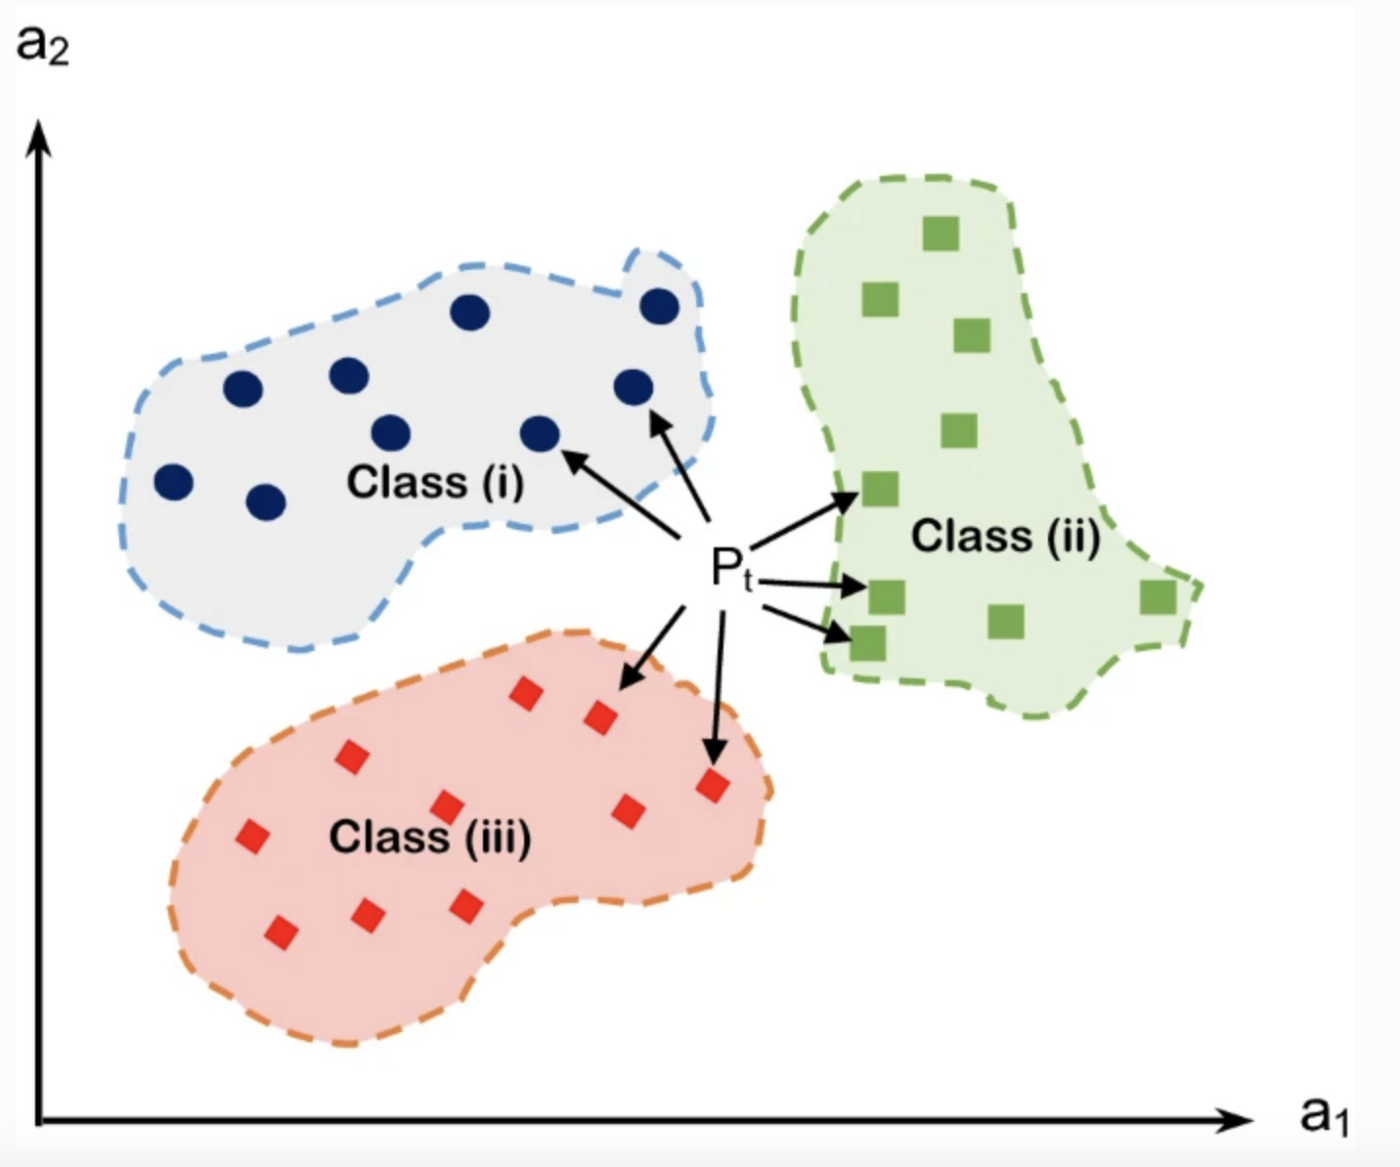
https://cambridgecoding.wordpress.com/2016/01/16/machine-learning-under-the-hood-writing-your-own-k-nearest-neighbour-algorithm/

#### Passos do Algoritmo

PASSO 1: Dado uma nova observação: escolha o número K de vizinhos

PASSO 2: Selecione os K vizinhos mais próximos, de acordo com a métrica escolhida

PASSO 3: Destes K vizinhos, conte a quantidade de cada categoria (target)

PASSO 4: Atribua à nova observação a categoria com maior quantidade no ponto anterior

In [ ]:
import numpy as np
import pandas as pd

#### 2.2 Load dataset

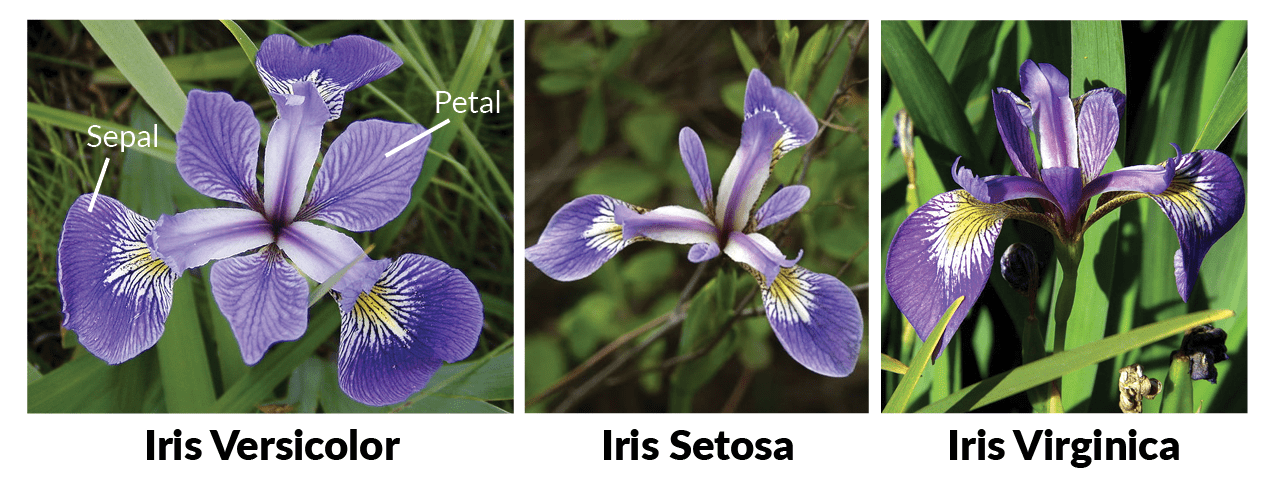

In [ ]:
dataset = pd.read_csv('Iris.csv')

In [ ]:
dataset.shape

In [ ]:
dataset.head(5)

In [ ]:
dataset.describe()

In [ ]:
# balanceamento da target
dataset.groupby('Species').size()

In [ ]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

In [ ]:
y

### Label encoding

Precisamos codificar a target para números

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Não iremos normalizar os dados pois eles já se encontram na mesma escala

### Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Pairplot

In [ ]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

#### Boxplots

In [ ]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

#### Visualização 3D

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("Vizualisação 3D", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

## KNN para Classificação

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Instanciação do Modelo (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fit do modelo
classifier.fit(X_train, y_train)

In [ ]:
# Predict
y_pred = classifier.predict(X_test)

#### Matriz de Confusão

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

### Verificando diferentes valores de K

In [ ]:
k_list = list(range(1,50,2))
k_list

In [ ]:
# inicialização da lista que vai guardar os scores
cv_scores = []

# execução do KNN com diferentes valores de K
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
cv_scores

In [ ]:
# convertendo para o "error"
ERR = [1 - x for x in cv_scores]

In [ ]:

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Melhor valor de K', fontsize=20, fontweight='bold')
plt.xlabel('Número de vizinhos K', fontsize=15)
plt.ylabel('Erro de classificação', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, ERR)

plt.show()

In [ ]:
# selecionando o melhor valor de K, pegando o valor mínimo
best_k = k_list[ERR.index(min(ERR))]
print("valor ótimo para k é %d." % best_k)